In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 18.8 MB/s eta 0:00:00


In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="*********")
project = rf.workspace("objectdetection-knwfp").project("weed_detection-qd19q")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weed_Detection-1 in yolov8:: 100%|██████████| 6248/6248 [00:01<00:00, 4698.71it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=5 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 424MB/s]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Weed_Detection-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

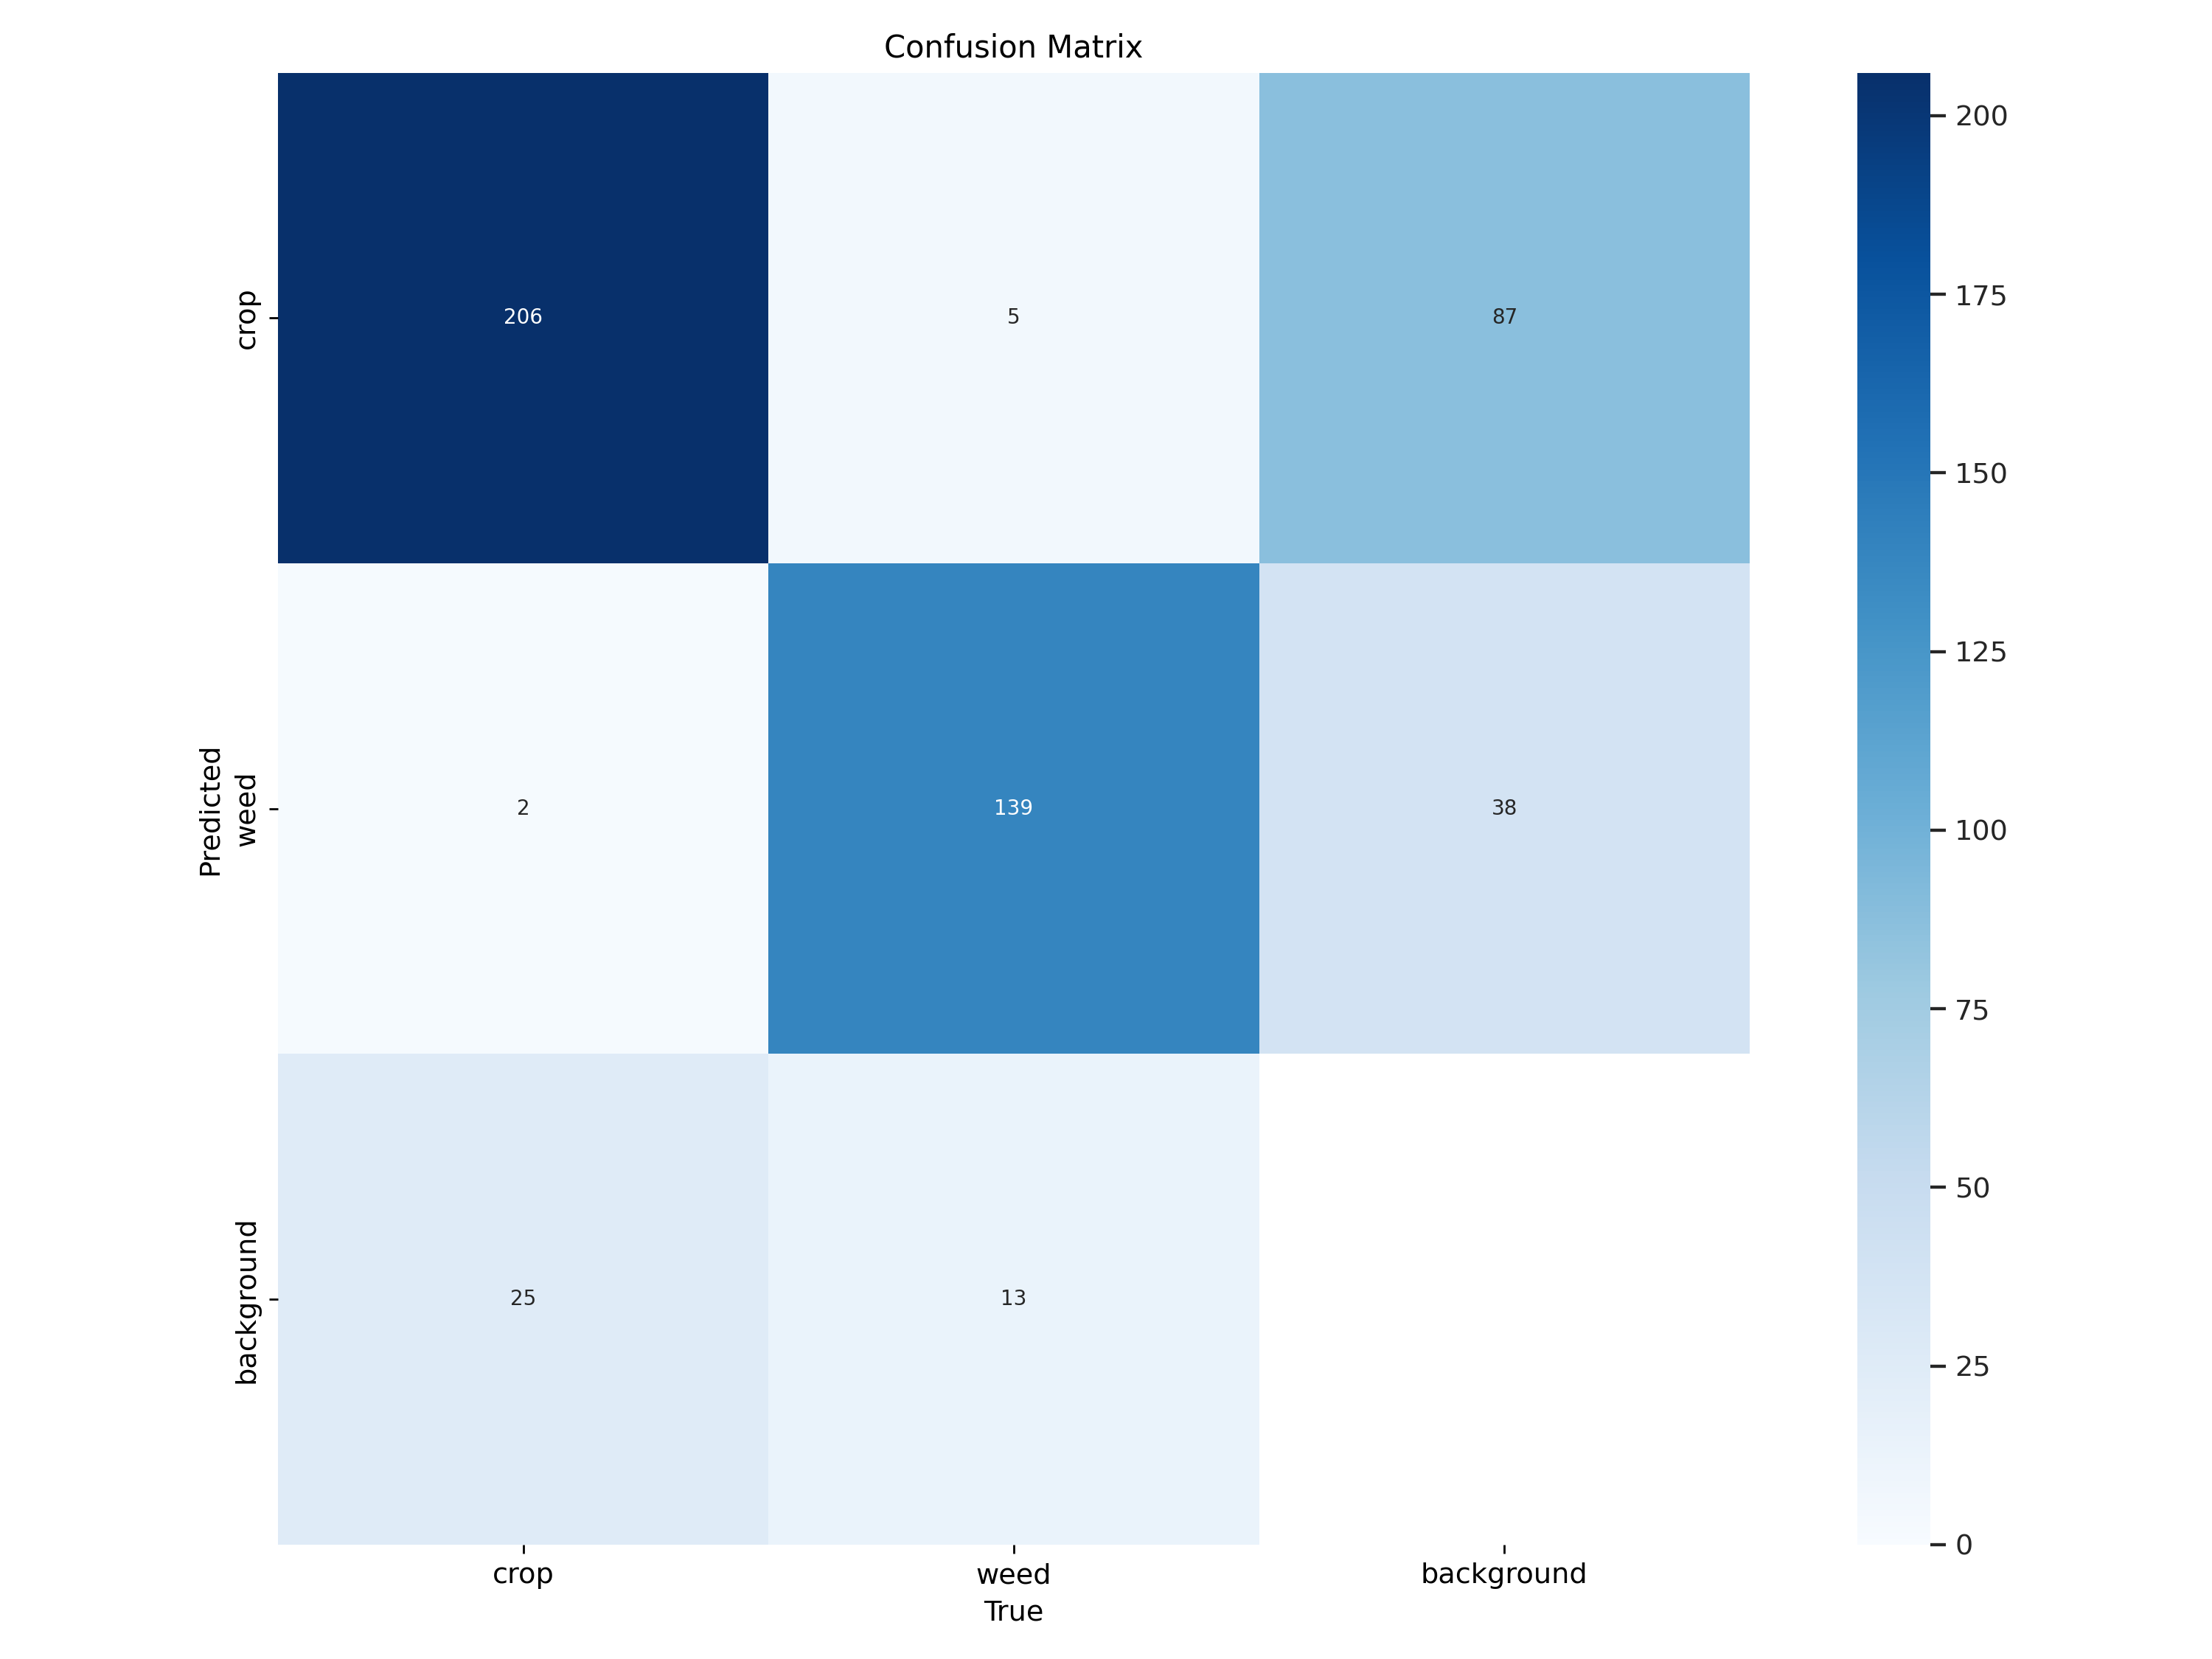

In [5]:
from IPython.display import Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png',width=600)

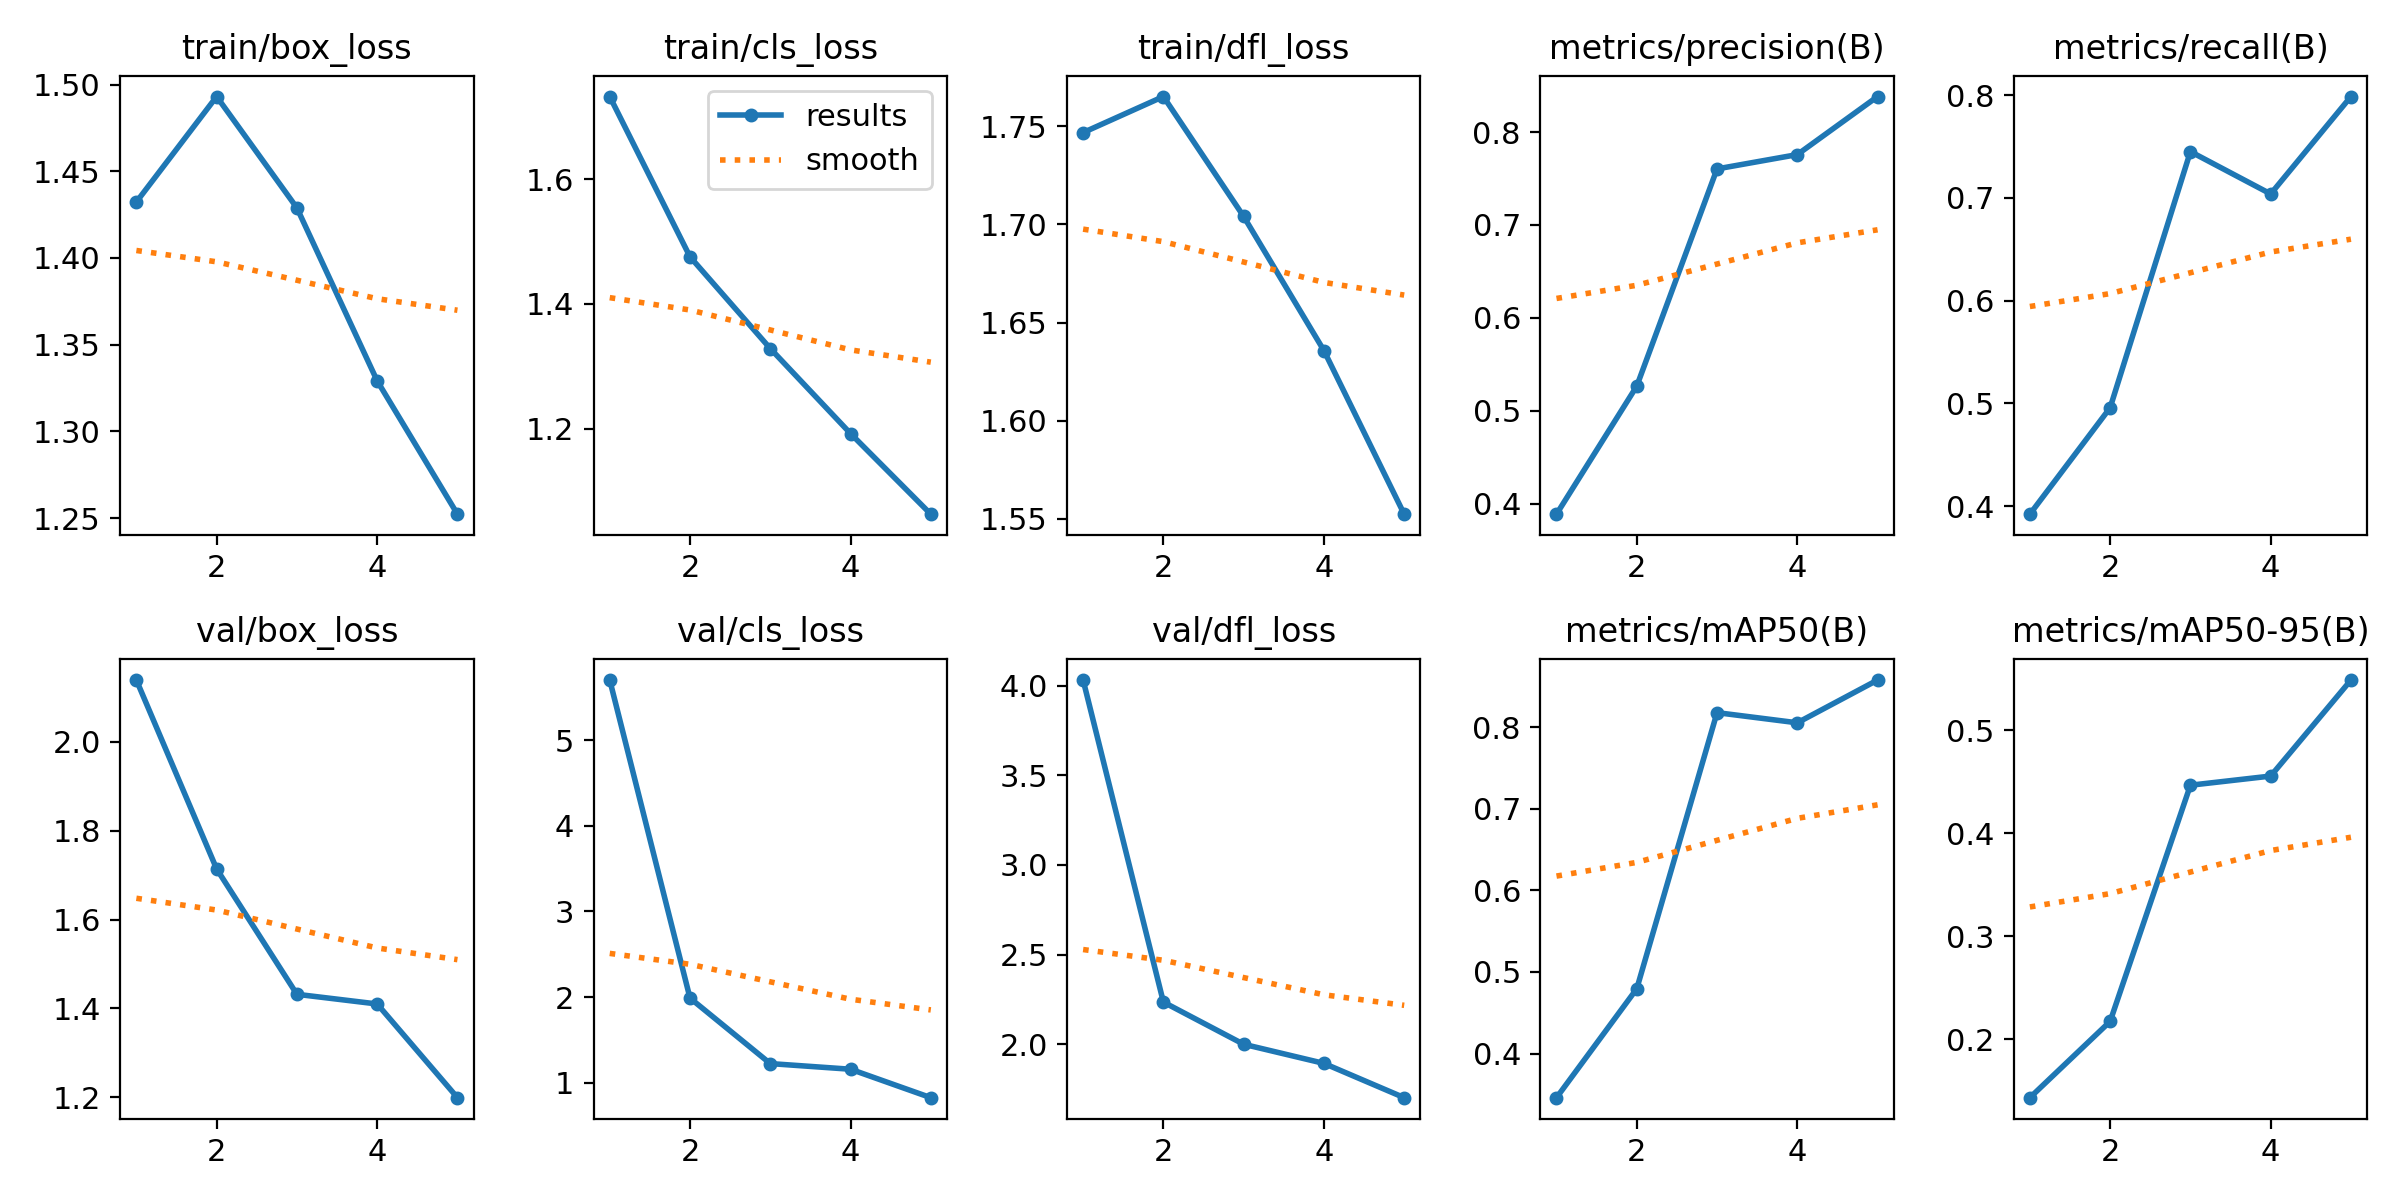

In [6]:
Image(filename=f'/content/runs/detect/train/results.png',width=600)

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Weed_Detection-1/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100% 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:08<00:00,  2.03it/s]
                   all        260        390      0.839      0.799      0.858      0.549
                  crop        126        233      0.818      0.731      0.831       0.57
                  weed        134        157       0.86      0.866      0.885      0.528
Speed: 0.2ms preprocess, 23.4ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
from google.colab import files
uploaded = files.upload()

Saving agri_0_352_jpeg.rf.d4c978e9b4f29ce461e5d1b97647f901.jpg to agri_0_352_jpeg.rf.d4c978e9b4f29ce461e5d1b97647f901.jpg


Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/agri_0_352_jpeg.rf.d4c978e9b4f29ce461e5d1b97647f901.jpg: 640x640 2 weeds, 37.0ms
Speed: 2.8ms preprocess, 37.0ms inference, 564.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


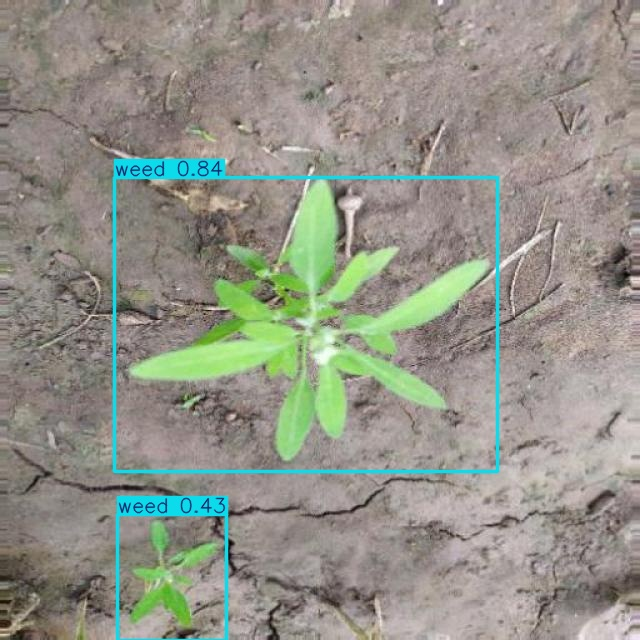

In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={list(uploaded.keys())[0]}
from IPython.display import Image
Image(filename=f'/content/runs/detect/predict/{list(uploaded.keys())[0]}', width=600)
